- we have two types of scaling

  - Z score (Standardization)

  - Min max scalar (Normalization)

**Z score**

<img src="https://toptipbio.com/wp-content/uploads/2018/07/Z-score-formula.jpg" jsaction="" class="sFlh5c FyHeAf iPVvYb" style="max-width: 435px; height: 233px; margin: 0px; width: 286px;" alt="What Is A Z-Score And How To Calculate Them?" jsname="kn3ccd">


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path=r"C:\\Users\\P.Siddartha\\Documents\\NareshIT\\datafiles\\Visadataset.csv"
visa_df=pd.read_csv(file_path)

cat=visa_df.select_dtypes(include='object').columns
num=visa_df.select_dtypes(exclude='object').columns


In [7]:
p_wage=visa_df['prevailing_wage']
Mean=np.mean(p_wage)
Std=np.std(p_wage)
Nr=p_wage-Mean
z_wage=Nr/Std
visa_df['z_wage']=z_wage
visa_df[['prevailing_wage','z_wage']]

,prevailing_wage,z_wage
0,592.2029,-1.398537
1,83425.6500,0.169835
2,122996.8600,0.919079
3,83434.0300,0.169994
4,149907.3900,1.428604
...,...,...
25475,77092.5700,0.049924
25476,279174.7900,3.876159
25477,146298.8500,1.360280
25478,86154.7700,0.221509


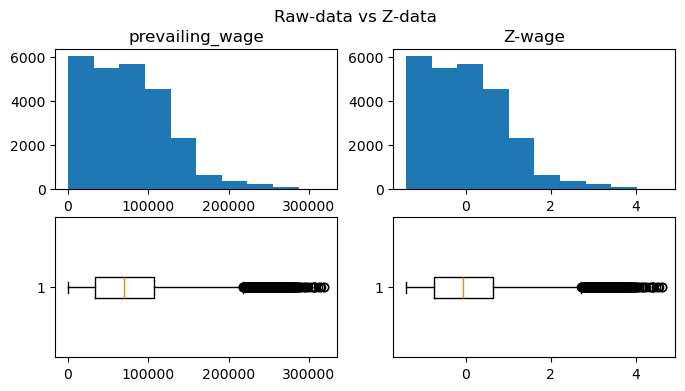

In [21]:
r1=visa_df[['prevailing_wage','z_wage']]
plt.figure(figsize=(8,4))
plt.suptitle('Raw-data vs Z-data')
plt.subplot(2,2,1).hist(p_wage)
plt.title('prevailing_wage')
plt.subplot(2,2,2).hist(z_wage)
plt.title('Z-wage')
plt.subplot(2,2,3).boxplot(p_wage,vert=False)
plt.subplot(2,2,4).boxplot(z_wage,vert=False)
plt.show()

**StandardScalar**

- sklearn

   - preprocesing
 
       - StandardScalar

In [24]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
wage_ss=ss.fit_transform(visa_df[['prevailing_wage']])
visa_df['wage_ss']=wage_ss

In [26]:
visa_df[['prevailing_wage','z_wage','wage_ss']]

,prevailing_wage,z_wage,wage_ss
0,592.2029,-1.398537,-1.398537
1,83425.6500,0.169835,0.169835
2,122996.8600,0.919079,0.919079
3,83434.0300,0.169994,0.169994
4,149907.3900,1.428604,1.428604
...,...,...,...
25475,77092.5700,0.049924,0.049924
25476,279174.7900,3.876159,3.876159
25477,146298.8500,1.360280,1.360280
25478,86154.7700,0.221509,0.221509


In [27]:
visa_df['prevailing_wage'].values

array([   592.2029,  83425.65  , 122996.86  , ..., 146298.85  ,
        86154.77  ,  70876.91  ])

In [28]:
visa_df['prevailing_wage'].values.reshape(-1,1)

array([[   592.2029],
       [ 83425.65  ],
       [122996.86  ],
       ...,
       [146298.85  ],
       [ 86154.77  ],
       [ 70876.91  ]])

**MInMaxScalear**

<img src="https://miro.medium.com/v2/resize:fit:888/1*ye1I00S61GqpR34ABZZFLQ.png" jsaction="" class="sFlh5c FyHeAf iPVvYb" style="max-width: 444px; height: 107px; margin: 20px 0px; width: 305px;" alt="How Min-Max Scaler Works. The math behind the min-max scaler | by Kamlesh  Kumar Rangi | Medium" jsname="kn3ccd">

In [29]:
Min=np.min(p_wage)
Max=np.max(p_wage)
Nr=p_wage-Min
Dr=Max-Min
wage_min_max=Nr/Dr
visa_df['wage_min_max']=wage_min_max
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,z_wage,wage_ss,wage_min_max
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,-1.398537,-1.398537,0.001849
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0.169835,0.169835,0.261345
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,0.919079,0.919079,0.385312
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,0.169994,0.169994,0.261371
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,1.428604,1.428604,0.469616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,0.049924,0.049924,0.241505
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,3.876159,3.876159,0.874579
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,1.360280,1.360280,0.458311
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,0.221509,0.221509,0.269895


In [31]:
max(Nr/Dr),min(Nr/Dr)

(1.0, 0.0)

In [34]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
mms.fit_transform(visa_df[['prevailing_wage']])
visa_df['mms']=mms
visa_df['prevailing_wage'].values.reshape(-1,1)

array([[   592.2029],
       [ 83425.65  ],
       [122996.86  ],
       ...,
       [146298.85  ],
       [ 86154.77  ],
       [ 70876.91  ]])

In [35]:
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,z_wage,wage_ss,wage_min_max,mms
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,-1.398537,-1.398537,0.001849,MinMaxScaler()
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0.169835,0.169835,0.261345,MinMaxScaler()
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,0.919079,0.919079,0.385312,MinMaxScaler()
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,0.169994,0.169994,0.261371,MinMaxScaler()
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,1.428604,1.428604,0.469616,MinMaxScaler()
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,0.049924,0.049924,0.241505,MinMaxScaler()
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,3.876159,3.876159,0.874579,MinMaxScaler()
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,1.360280,1.360280,0.458311,MinMaxScaler()
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,0.221509,0.221509,0.269895,MinMaxScaler()
